<a href="https://colab.research.google.com/github/StevenHolmberg/CSE5683/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json

In [50]:
video_path = '/content/drive/MyDrive/AdvancedComputerVision/Assignment4_images/6_1.mp4'
vidcap = cv2.VideoCapture(video_path)

if not vidcap.isOpened():
    raise ValueError(f"Could not open video file: {video_path}")

In [51]:
!ls
from google.colab import drive
drive.mount('/content/drive/')

3_2.mp4  3_4.mp4  6_1.mp4  calibration.json
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [52]:
!ls
%cd /content/drive/MyDrive/AdvancedComputerVision/Assignment4_images/
!ls

3_2.mp4  3_4.mp4  6_1.mp4  calibration.json
/content/drive/MyDrive/AdvancedComputerVision/Assignment4_images
3_2.mp4  3_4.mp4  6_1.mp4  calibration.json


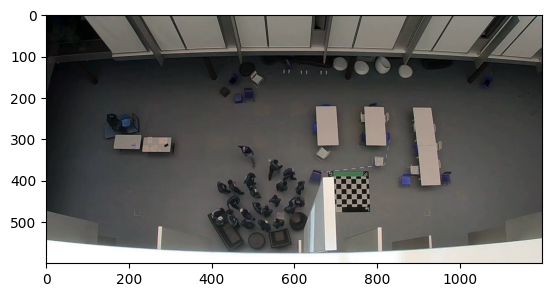

In [53]:
# Parses the json file
def json_read(filename):
    try:
        with open(os.path.abspath(filename)) as f:
            data = json.load(f)
        return data
    except:
        raise ValueError("Unable to read JSON {}".format(filename))

# Read json file containing the calibration data
calibration = json_read("calibration.json")

# Show the first frame from one of the videos
view = '6_1'
vidcap = cv2.VideoCapture("{}.mp4".format(view))
success,img = vidcap.read()

if not os.path.exists('6_1.mp4'):
    raise FileNotFoundError(f"File does not exist: {'6_1.mp4'}")
if not vidcap.isOpened():
    raise ValueError(f"Could not open video file: {view}.mp4")
if not success:
    raise ValueError(f"Could not read the first frame from {view}.mp4")

# Get the calibration matrices
Lambda = np.array(calibration[view]['K'])      # Intrinsic params.
Omega  = np.array(calibration[view]['R'])      # Rotation
tau    = np.array(calibration[view]['t'])      # Translation
dist   = np.array(calibration[view]['dist'])   # Lens distortion

tau = tau.reshape(-1, 1)  # Reshape into a column vector
extrinsic = np.vstack(( np.hstack((Omega, tau)) , [0, 0, 0, 1]))

intrinsic = np.hstack((Lambda, np.zeros((3, 1))))

plt.figure()
plt.imshow(img)
img = cv2.undistort(img, Lambda, dist)


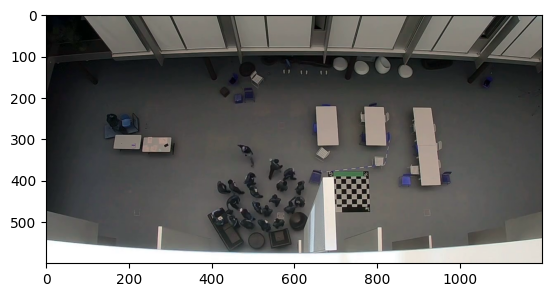

In [54]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Parses the json file
def json_read(filename):
    try:
        with open(os.path.abspath(filename)) as f:
            data = json.load(f)
        return data
    except:
        raise ValueError(f"Unable to read JSON {filename}")

# Read json file containing the calibration data
calibration = json_read("calibration.json")

# Show the first frame from one of the videos
view = '6_1'
video_file = "{}.mp4".format(view)
success, img = vidcap.read()

vidcap = cv2.VideoCapture(video_file)

# Get the calibration matrices
Lambda = np.array(calibration[view]['K'])      # Intrinsic params.
Omega  = np.array(calibration[view]['R'])      # Rotation
tau    = np.array(calibration[view]['t'])      # Translation
dist   = np.array(calibration[view]['dist'])   # Lens distortion

tau = tau.reshape(-1, 1)  # Reshape into a column vector
extrinsic = np.vstack((np.hstack((Omega, tau)), [0, 0, 0, 1]))
intrinsic = np.hstack((Lambda, np.zeros((3, 1))))

# Display the first frame
plt.figure()
plt.imshow(img)
plt.show()

# Undistort the image
img = cv2.undistort(img, Lambda, dist)


[370.34822861 358.4724368  370.79427819 359.02279201 469.3910494
 463.01640207 469.21059209 462.86898253] [679.92648301 684.86810403 777.76943495 788.30331249 682.03379992
 687.28758958 783.30783772 794.56497832]


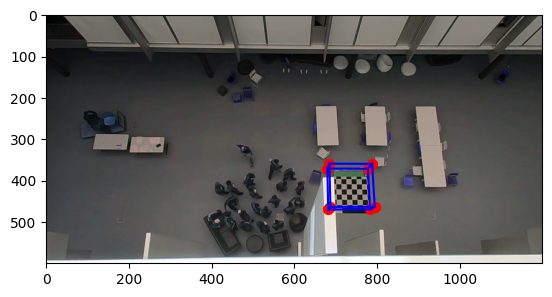

In [55]:
tau = tau.reshape(-1, 1)  # Reshape into a column vector
extrinsic = np.vstack(( np.hstack((Omega, tau)) , [0, 0, 0, 1]))

intrinsic = np.hstack((Lambda, np.zeros((3, 1))))

# Each column represents a vertex of the cube
points = np.array([[0, 0, 0, 0, 2, 2, 2, 2],
                   [-1.25, -1.25, 0.75, 0.75, -1.25, -1.25, 0.75, 0.75],
                   [0, 1, 0, 1, 0, 1, 0, 1]])

# Adding homogeneous coordinate for transformations (adding a row of 1's)
points = np.vstack((points, np.ones((1, points.shape[1]))))

[x, y, c] = intrinsic @ extrinsic @ points

i = (y / c)
j = (x / c)

print(i,j)

# Connect the points to make edges of the cube
edges = [
    (0, 1), (0, 2), (1, 3), (2, 3),  # Bottom face
    (4, 5), (4, 6), (5, 7), (6, 7),  # Top face
    (0, 4), (1, 5), (2, 6), (3, 7)   # Vertical edges connecting top and bottom faces
]

plt.figure()
plt.imshow(img)
plt.scatter(j, i, color='red', s=50)  # 's' is the size of the point
# Draw the edges by connecting the corresponding points
for edge in edges:
    plt.plot([j[edge[0]], j[edge[1]]], [i[edge[0]], i[edge[1]]], color='blue')



In [56]:
# Parses the json file
def json_read(filename):
    try:
        with open(os.path.abspath(filename)) as f:
            data = json.load(f)
        return data
    except:
        raise ValueError("Unable to read JSON {}".format(filename))

# Read json file containing the calibration data
calibration = json_read("calibration.json")

# Show the first frame from one of the videos
view = '3_2'
vidcap = cv2.VideoCapture("{}.mp4".format(view))
success,img1 = vidcap.read()

# Get the calibration matrices
Lambda_1 = np.array(calibration[view]['K'])      # Intrinsic params.
Omega_1  = np.array(calibration[view]['R'])      # Rotation
tau_1    = np.array(calibration[view]['t'])      # Translation
dist_1   = np.array(calibration[view]['dist'])   # Lens distortion

tau_1 = tau_1.reshape(-1, 1)  # Reshape into a column vector
extrinsic = np.vstack(( np.hstack((Omega_1, tau_1)) , [0, 0, 0, 1]))

intrinsic = np.hstack((Lambda_1, np.zeros((3, 1))))

# Show the first frame from one of the videos
view = '3_4'
vidcap = cv2.VideoCapture("{}.mp4".format(view))
success,img2 = vidcap.read()

# Get the calibration matrices
Lambda_2 = np.array(calibration[view]['K'])      # Intrinsic params.
Omega_2  = np.array(calibration[view]['R'])      # Rotation
tau_2    = np.array(calibration[view]['t'])      # Translation
dist_2   = np.array(calibration[view]['dist'])   # Lens distortion

tau_2 = tau_2.reshape(-1, 1)  # Reshape into a column vector
extrinsic = np.vstack(( np.hstack((Omega_2, tau_2)) , [0, 0, 0, 1]))

intrinsic = np.hstack((Lambda_2, np.zeros((3, 1))))

# Show the first frame from one of the videos
view = '6_1'
vidcap = cv2.VideoCapture("{}.mp4".format(view))
success,img3 = vidcap.read()

# Get the calibration matrices
Lambda_3 = np.array(calibration[view]['K'])      # Intrinsic params.
Omega_3  = np.array(calibration[view]['R'])      # Rotation
tau_3    = np.array(calibration[view]['t'])      # Translation
dist_3   = np.array(calibration[view]['dist'])   # Lens distortion

tau_3 = tau_3.reshape(-1, 1)  # Reshape into a column vector
extrinsic = np.vstack(( np.hstack((Omega_3, tau_3)) , [0, 0, 0, 1]))

intrinsic = np.hstack((Lambda_3, np.zeros((3, 1))))


img1 = cv2.undistort(img1, Lambda, dist)
img2 = cv2.undistort(img2, Lambda, dist)
img3 = cv2.undistort(img3, Lambda, dist)


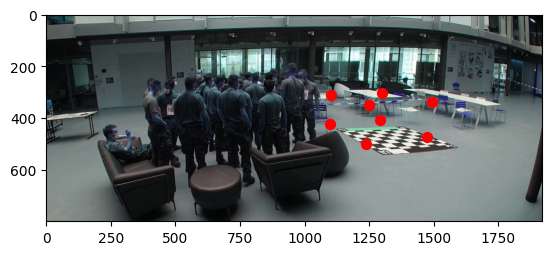

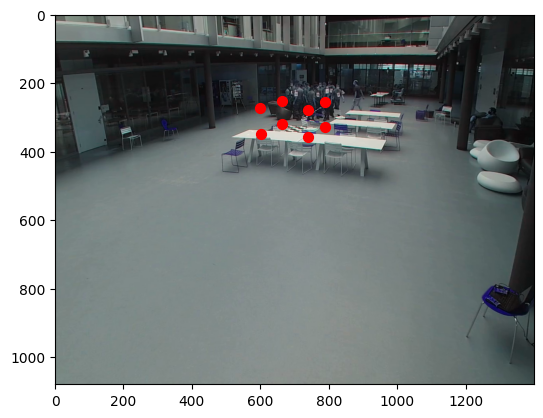

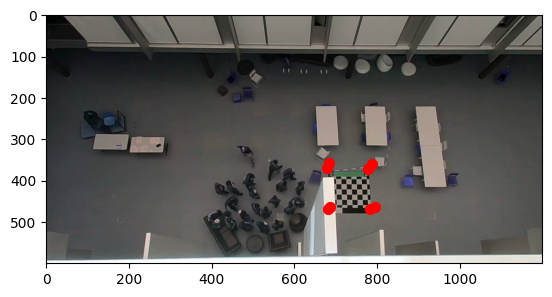

In [57]:
pixel_x_1 = [424, 309, 408, 302, 501, 350, 472, 336]
pixel_y_1 = [1099, 1104, 1291, 1301, 1238, 1250, 1473, 1492]

pixel_x_2 = [327, 256, 357, 277, 319, 253, 347, 271]
pixel_y_2 = [788, 789, 740, 740, 664, 662, 603, 598]

pixel_x_3 = [370, 358, 371, 359, 469, 463, 469, 463]
pixel_y_3 = [680, 685, 778, 788, 682, 687, 783, 795]

plt.figure()
plt.imshow(img1)
plt.scatter(pixel_y_1, pixel_x_1, color='red', s=50)  # 's' is the size of the point

plt.figure()
plt.imshow(img2)
plt.scatter(pixel_y_2, pixel_x_2, color='red', s=50)  # 's' is the size of the point

plt.figure()
plt.imshow(img3)
plt.scatter(pixel_y_3, pixel_x_3, color='red', s=50)  # 's' is the size of the point


[[ 0.80992946]
 [-2.29052411]
 [23.79101903]]
[[ 0.89022449]
 [-2.25228909]
 [24.07855006]]
[[ 1.41071146]
 [-2.54035416]
 [22.08952907]]
[[ 1.50029192]
 [-2.46870219]
 [22.24395407]]
[[ 1.50744753]
 [-2.67889593]
 [23.41059551]]
[[ 1.56041877]
 [-2.63301526]
 [23.69490997]]
[[ 2.17128774]
 [-2.90412514]
 [21.41967474]]
[[ 2.25104975]
 [-2.81049164]
 [21.49092465]]


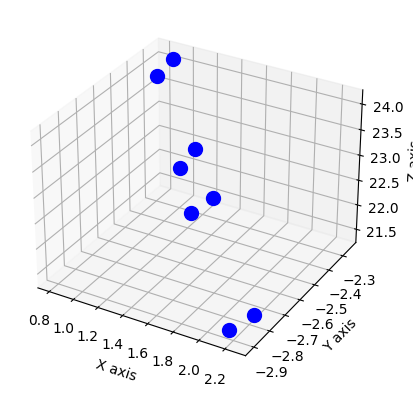

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

lambda_list = [Lambda_1, Lambda_2, Lambda_3]
omega_list = [Omega_1, Omega_2, Omega_3]
tau_list = [tau_1, tau_2, tau_3]

pixel_xs = np.vstack([pixel_x_1, pixel_x_2, pixel_x_3])
pixel_ys = np.vstack([pixel_y_1, pixel_y_2, pixel_y_3])

for j in range(len(pixel_x_1)):

  A = np.zeros([len(omega_list)*2, 3])
  b = np.zeros([len(omega_list)*2, 1])

  for i in range(len(omega_list)):
    pixel_x = pixel_xs[i,j]
    pixel_y = pixel_ys[i,j]
    Lambda = lambda_list[i]
    Omega = omega_list[i]
    tau = tau_list[i]
    x_prime_j = np.linalg.inv(Lambda) @ np.array([[pixel_x], [pixel_y], [1]]).flatten()

    a1 = np.array([
        Omega[2, 0] * x_prime_j[0] - Omega[0, 0],
        Omega[2, 1] * x_prime_j[0] - Omega[0, 1],
        Omega[2, 2] * x_prime_j[0] - Omega[0, 2]
    ], float)

    a2 = np.array([
        Omega[2, 0] * x_prime_j[1] - Omega[0, 0],
        Omega[2, 1] * x_prime_j[1] - Omega[0, 1],
        Omega[2, 2] * x_prime_j[1] - Omega[0, 2]
    ], float)

    b1 = -tau[2] * x_prime_j[0] + tau[0]
    b2 = -tau[2] * x_prime_j[1] + tau[1]

    # print("Tau", tau)
    # print(A, b)
    A[2*i,:] = a1
    A[2*i+1,:] = a2
    b[2*i,:] = b1
    b[2*i+1,:] = b2
  # print(A, b)

  # Now solve the least-squares problem
  w = np.linalg.pinv(A.T @ A) @ (A.T @ b)
  ax.scatter(w[0], w[1], w[2], color='b', s=100)  # 'b' for blue color, 's' for size

  print(w)


# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the plot
plt.show()